<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7344 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7344 non-null   float64
 1   PT08.S1(CO)    7344 non-null   float64
 2   NMHC(GT)       863 non-null    float64
 3   C6H6(GT)       7344 non-null   float64
 4   PT08.S2(NMHC)  7344 non-null   float64
 5   NOx(GT)        6944 non-null   float64
 6   PT08.S3(NOx)   7344 non-null   float64
 7   NO2(GT)        6941 non-null   float64
 8   PT08.S4(NO2)   7344 non-null   float64
 9   PT08.S5(O3)    7344 non-null   float64
 10  T              7344 non-null   float64
 11  RH             7344 non-null   float64
 12  AH             7344 non-null   float64
 13  Unnamed: 15    0 non-null      float64
 14  Unnamed: 16    0 non-null      float64
dtypes: float64(15)
memory usage: 918.0 KB
None
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT

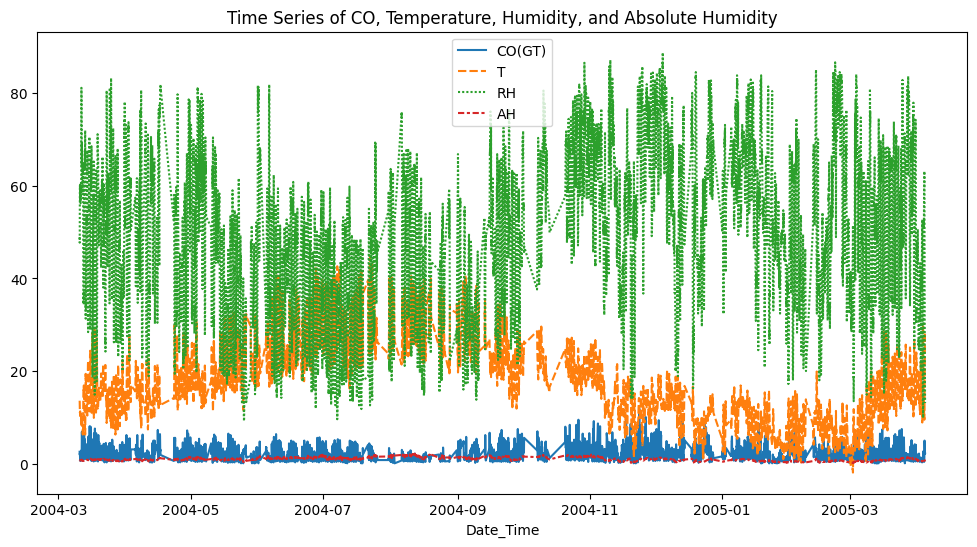

Mean Squared Error: 1.9331507927809195
R^2 Score: 0.009468684900400981


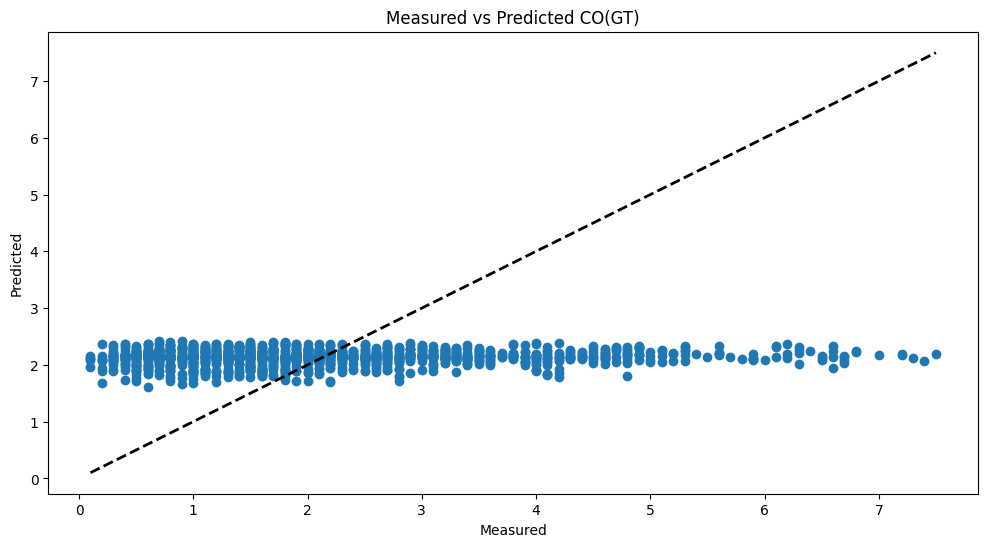

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 加载数据
file_path = 'data/AirQualityUCI.csv'
data = pd.read_csv(file_path, sep=';', decimal=',', na_values=-200)
data['Date_Time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S')
data.drop(columns=['Date', 'Time'], inplace=True)

# 数据预处理
data.dropna(subset=['CO(GT)', 'T', 'RH', 'AH'], inplace=True)  # 只删除包含特征和目标变量的缺失值
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format='%d/%m/%Y %H.%M.%S')
data.set_index('Date_Time', inplace=True)

# 初步数据分析
print(data.info())
print(data.describe())

# 可视化数据
plt.figure(figsize=(12, 6))
sns.lineplot(data=data[['CO(GT)', 'T', 'RH', 'AH']])
plt.title('Time Series of CO, Temperature, Humidity, and Absolute Humidity')
plt.show()

# 特征和目标变量
X = data[['T', 'RH', 'AH']]
y = data['CO(GT)']

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 训练线性回归模型
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 预测
y_pred = model.predict(X_test_scaled)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 可视化预测结果
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted CO(GT)')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# 创建一个包含标准化和线性回归的管道
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# 定义超参数网格
param_grid = {
    'regressor__fit_intercept': [True, False]
}

# 使用网格搜索进行超参数调优
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best R^2 Score: {grid_search.best_score_}')

# 使用最佳模型进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 可视化预测结果
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted CO(GT)')
plt.show()

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].